## Final Project Submission

Please fill out:
* Student name: Kevin Gitahi
* Student pace: full time student
* Scheduled project review date/time: 
* Instructor name: Nikita Njoroge/Diana Mongina
* Blog post URL:


## PHASE_1 PROJECT

## TITLE:EXPLORATORY DATA ANALYSIS FOR MICROSOFT'S UPCOMING FILM STUDIO.

## 1.0 BUSINESS UNDERSTANDING/PROJECT OVERVIEW
1.1 INTRODUCTION.

Microsoft Studio, a brand-new film production company, brought this concept to life. 
With the intention of assisting them in making quality films that would be successful in the future, they tasked me to undertake research using databases from other seasoned film production firms, like Box Office Mojo, IMDB, Rotten Tomatoes, The MovieDB, and The Number. Due to its recent establishment, this film studio lacks experience in creating quality films that would be commercially successful. To find the films that other production companies utilize to make additional quality films, I will thus need to carry out an exploratory data analysis using the imported  data from the other studios.

1.2 PROBLEM STATEMENT.

Microsoft aims to be a successful player in the entertainment industry by avoiding the complexities of the film studio industry and starting a new company that will create original video content that will appeal to audiences and maximize revenue.With no prior experience in film production, Microsoft recognizes the need to educate itself on the current landscape of box office performers. This knowledge is critical to the studio's strategic decisions regarding the kind of films it should produce in order to draw audiences and thrive in the fiercely competitive market.

1.3 MAIN OBJECTIVE.

The main objective of this project is to identify the genres of film or films that are currently doing well at the box office in order to examine current trends in the film industry. The results will be used to shed light on decisions about the kinds of films that the Microsoft Company, a new studio, will make.
 
 1.4 SPECIFIC OBJECTIVES.
 
  1. To examine the present cinematic trends based on Box Office Productions
  2. To review the mined data  in order to identify the films that are doing well at the box office.
  3. To Translate the results obtained into useful information that Microsoft Studio may utilize to make wise choices for creating  high-caliber films.
  4. To offer suggestions for the kinds of movies that are most likely to be popular  in future.
     
 1.5 SIGNIFICANCE OF THE STUDY/ RECOMMENDATION
 
 1.5.1.Significance of the study
 
   The study helped to understand how different films and genres were performing in the market and this will help Microsoft Studio Stakeholders to make the right decisions even before starting film production.
   
1.5.2.Recommendations

   After the study i had the following recommendations for Microsoft studio;
  1. I  would recommend Microsoft studio to produce more of these listed genres; Drama, Action movies and Adventure since they were the most loved genres and this will attract more audience and in return more revenue to Microsoft Studios.
  2. I would recommend microsoft to produce movies like The monkey King 3 movie [2018] since it was doing great worldwide and had the highest foreign gross income of over 11.4 Millions,which translates to more money to the company as compared to producing the other movies
  3. I  would recommend Microsoft studio to produce movies rated R or rated PG-13 since they were the most consumed and this in turn bring money to the company.
   

## 2.DATA MINING
This project used data obtained from datasets from other seasoned film production firms,That is:
* Box Office Mojo 
* Rotten Tomatoes
* IMDB SQL Database(structure shown in the attached image)
* 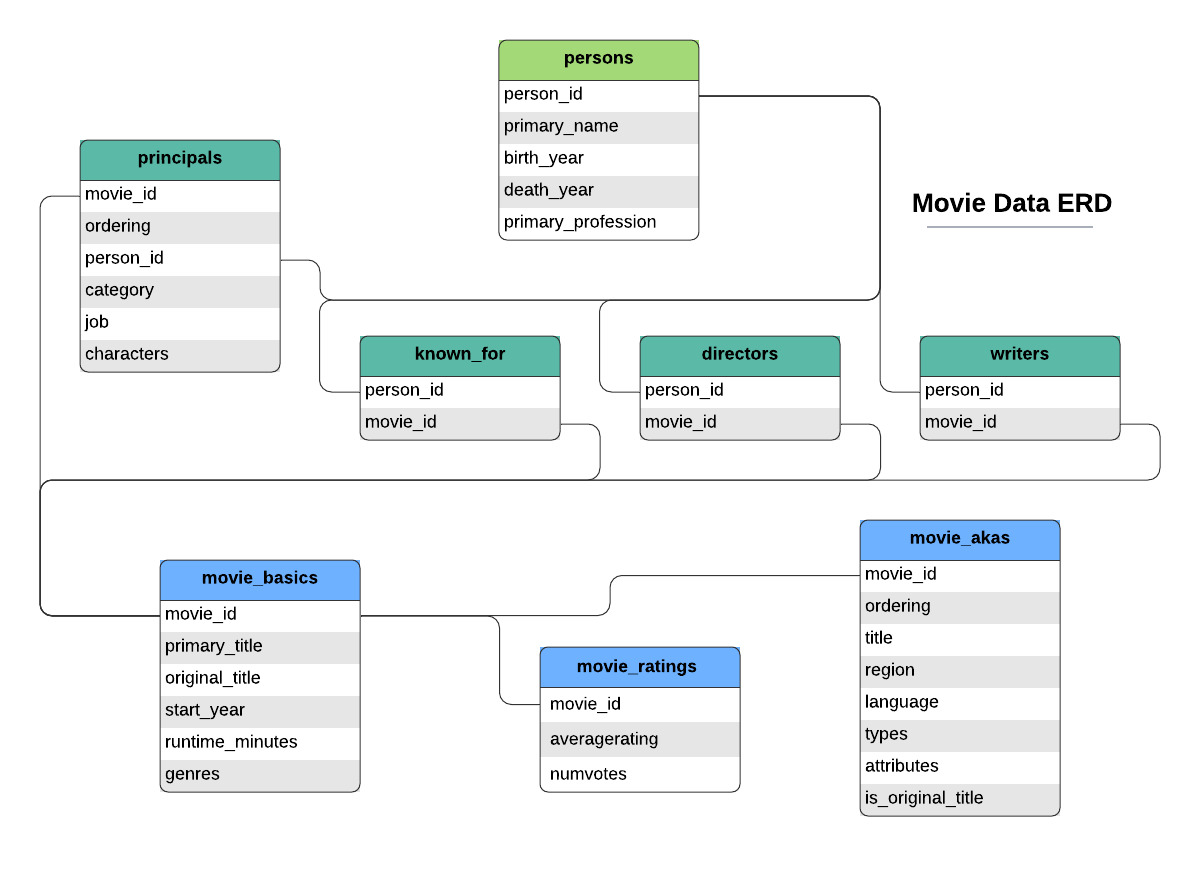


I loaded the data samples into my databases, where I utilized them to ascertain the films and genres that are now enjoying commercial success.The data is made up of a database (IMDB) and had 8 different tables. While the Box office and Rotten tomatoes data was made up of rows and columns



## 3.0 DATA CLEANING
Import the necessary libraries

In [346]:
import pandas as pd 
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import os

When carrying out data cleaning i had to ask myself the following Questions so that I could  clean my data appropriately.
    
    QUESTIONS
 * What are the columns?
 * How many observations?
 * Are there missing values?
 * Any duplicates?

## 3.1. DATA CLEANING - IMDB SQL FILE

Imported the zipfile module, opened a zip file named 'im.db.zip' located in the 'zippedData' directory in read mode, and extracted all the contents of the zip file into the 'zippedData' directory.

In [347]:
import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData')

Understanding the database and retrieving the tables(names) as Table Names that make  our database im.db to match the attached image above(IMDB SQL Database)

In [348]:
import sqlite3

conn = sqlite3.connect('zippedData/im.db')
table_query = """  SELECT * FROM sqlite_master  """
tables = pd.read_sql(table_query, conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [349]:
table_name_query ="""SELECT name
                     AS"Table Names"
                     FROM sqlite_master
                     WHERE type = 'table';"""
pd.read_sql(table_name_query,conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


concentrating on movie_basics table and movie_ratings table

a)reading movie_basics table

In [350]:
pd.read_sql("""
 SELECT * 
 FROM movie_basics;
 """, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


b)reading movie_ratings table

In [351]:
pd.read_sql("""
 SELECT * 
 FROM movie_ratings;
 """, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


I noted that both the movie rating table and movie basic table have a common key,that is Movie_id.This is an eye open since it helped me to join the two table using the  move _id.

In [352]:
df=pd.read_sql("""
              SELECT * 
              FROM movie_ratings
              JOIN movie_basics
              USING (movie_id);
             """,conn)
df


,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


i)get to know the columns

In [353]:
print(df.columns)

Index(['movie_id', 'averagerating', 'numvotes', 'primary_title',
       'original_title', 'start_year', 'runtime_minutes', 'genres'],
      dtype='object')


ii)checking the information of the data contained in the joint table.

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


From the information above obtained from the joint table ,I was able to observe the following:
* The total number of entries was 73856
* There was both Numerical and categorical data:
  
          a)Numerical data[ averagerating,numvotes,start_year,runtime_minutes]
  
          b)categorical data [ movie_id,primary_title,original_title, genres]
* I had quite a huge number of missing values in my data

   The run time_minute and genres had missing values

previewing of the dataset

In [355]:
#checking first 4 rows
df.head(4)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"


In [356]:
#checking the last rows
df.tail()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary
73855,tt9894098,6.3,128,Sathru,Sathru,2019,129.0,Thriller


checking for the sum of NAN values in the dataset

In [357]:
df.isnull().sum()

movie_id              0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64

Noticed runtime_minutes and genres had missing values as mentioned above.

dropped rows that contained missing values

In [358]:
df.dropna(inplace = True)

confirmed the new data without missing values

In [359]:
df.isnull().sum()

movie_id           0
averagerating      0
numvotes           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

checking for duplicates

In [360]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
73849    False
73851    False
73852    False
73854    False
73855    False
Length: 65720, dtype: bool

In [361]:
duplicate_data = df[df.duplicated()]
duplicate_data

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres


The data had no Duplicates

            A better cleaned data set

In [362]:
df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73849,tt9768966,8.6,27,Plugged in,Plugged in,2019,53.0,Documentary
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


          OBSERVATION 
Previous data set before cleaning had 73856 .The new data set obtained had 65720 rows

## DATA VISUALIZATION 
## 1).imdb sql file

## figure.1
Bar plot showing Current Boxmovie trends in the market by genres

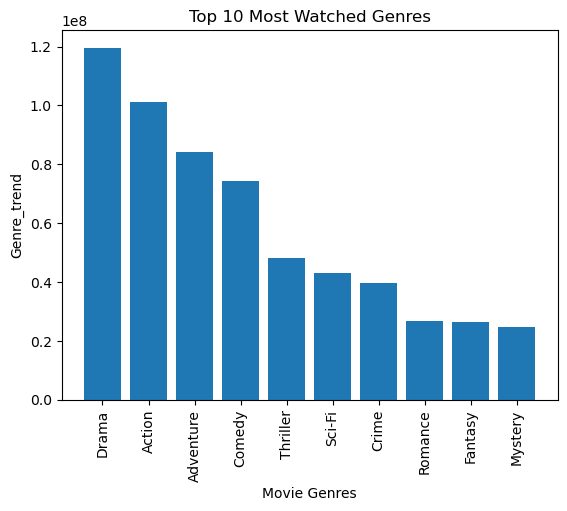

In [363]:
#Loaded my dataset
df = pd.read_sql("""
           SELECT *   
           FROM movie_ratings
           JOIN movie_basics
           USING (movie_id);
           """, conn)
df

#Splitted genres into separate values
df['genres'] = df['genres'].str.split(',')

#Created one row per genre per movie
df = df.explode('genres')

#Group by genre and find sum of votes(this helps to understand which movie the audience showed imence love)
genre_votes = df.groupby('genres')['numvotes'].sum()

#Sort by number of votes and Limit to the first 10
top_genres = genre_votes.sort_values(ascending=False)[:10]

#Plot a bar chart
plt.bar(top_genres.index, top_genres.values)
plt.xlabel('Movie Genres')
plt.ylabel('Genre_trend')
plt.title('Top 10 Most Watched Genres')
plt.xticks(rotation=90)
plt.show()

## Observations

The most loved genre among the people is Drama,it has the highest number in genre_trend, Followed by Action genre, and Adventure comes in third.From the sample, Mystery Genre comes last and it is struggling on that spot. People showed less or no  interest in the genre together with fantacy and romance genre.

## 3.2.DATA CLEANING - Bom.movie -Gross.csv

Since i had earlier imported the packages i am moved to the next step reading and understanding the csv file.,and cleaned the data

In [364]:
#read csv file
bom_movie=pd.read_csv("zippedData/bom.movie_gross.csv")
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [365]:
bom_movie.shape

(3387, 5)

The data has 3387 rows and 5 columns

ii)checking the information of the data contained in bom.movie_gross.csv

In [366]:
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


From the information above obtained from the bom.movie_gross.csv ,I was able to observe the following:

The total number of entries was 3387

There was both Numerical and categorical data:

    a)Numerical data[domestic gross, year]

    b)categorical data [title,studio,foreigh gross]
I had quite a huge number of missing values in my data

Foreign_gross,studio,domestic_gross had missing values

In [367]:
#checking the first 4 rows
bom_movie.head(4)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010


In [368]:
#checking the last rows
bom_movie.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


Noted a large number of Nan values in foreign_gross column from the last 5 rows

In [369]:
#checking null values 
#isnull is used
bom_movie.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [370]:
bom_movie.isna()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


 checked for peculiarities and used the code shown below.code iterated over each column in a DataFrame (df), printed the column name, followed by the top 5 most frequent values in that column along with their respective normalized counts, and adds a newline between each column's output.

In [371]:
for col in bom_movie.columns:
    print(col, '\n', bom_movie[col].value_counts(normalize=True).head(), '\n\n')

title 
 title
Bluebeard               0.000590
Before We Go            0.000295
Knock Knock             0.000295
Kindergarten Teacher    0.000295
Welcome to Leith        0.000295
Name: proportion, dtype: float64 


studio 
 studio
IFC      0.049083
Uni.     0.043465
WB       0.041396
Fox      0.040213
Magn.    0.040213
Name: proportion, dtype: float64 


domestic_gross 
 domestic_gross
1100000.0    0.009527
1000000.0    0.008931
1300000.0    0.008931
1200000.0    0.007443
1400000.0    0.006847
Name: proportion, dtype: float64 


foreign_gross 
 foreign_gross
1200000    0.011291
1100000    0.006873
4200000    0.005891
1900000    0.005891
1300000    0.005400
Name: proportion, dtype: float64 


year 
 year
2015    0.132861
2016    0.128727
2012    0.118099
2011    0.117803
2014    0.116622
Name: proportion, dtype: float64 




            Checked Missing data in my dataset and Solved it.

     a)Studio column

In [372]:
bom_movie["studio"].value_counts()

studio
IFC           166
Uni.          147
WB            140
Fox           136
Magn.         136
             ... 
E1              1
PI              1
ELS             1
PalT            1
Synergetic      1
Name: count, Length: 257, dtype: int64

From the studio column,E1,P1,ELS,PalT and Synergetic have peculiar values;That is Nan values.Corrected this by replacing 1 with 166.the value in IFC

In [373]:
bom_movie['studio'] = bom_movie['studio'].fillna('IFC')

Confirmed if the peculiar values in the data had been replaced by the value of IFC to solve the  issue of missing data seen in studio column by running the code below.

In [374]:
#Recheck for missing values in studio column
bom_movie.isna().sum()

title                0
studio               0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

confirmed missing data issue corrected,in studio column

        b)domestic_gross

In [375]:
bom_movie.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


Replace the missing values with the median

In [376]:
bom_movie["domestic_gross"] = bom_movie["domestic_gross"].fillna(bom_movie["domestic_gross"].median())

confirmed if domestic_gross had missing values

In [377]:
bom_movie.isna().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

foreign_gross still contained NaNs,corrected that with dataframe.dropna()

In [378]:
bom_movie.dropna()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


Assertained the NaNs had been dropped,but not eliminated since after calling the function below foreign_gross column had NaNs.

In [379]:
bom_movie.isna().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

Dropped the NaNs from the dataframe

In [380]:
bom_movie.dropna(inplace = True)

In [381]:
bom_movie.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

checked for duplicates

In [382]:
duplicates = bom_movie[bom_movie.duplicated()]
duplicates.head()

,title,studio,domestic_gross,foreign_gross,year


No duplicate value in the data

## DATA VISUALIZATION
## 2) Bom.Movie-gross.csv.gz

## figure.2 
Bar plot showing Current(2018) movie trends that are profitable in the market-internationally.
The reason for checking the 2018 data is because it was the resent year and it is good to work with current data.For my case 2018 was best choice.

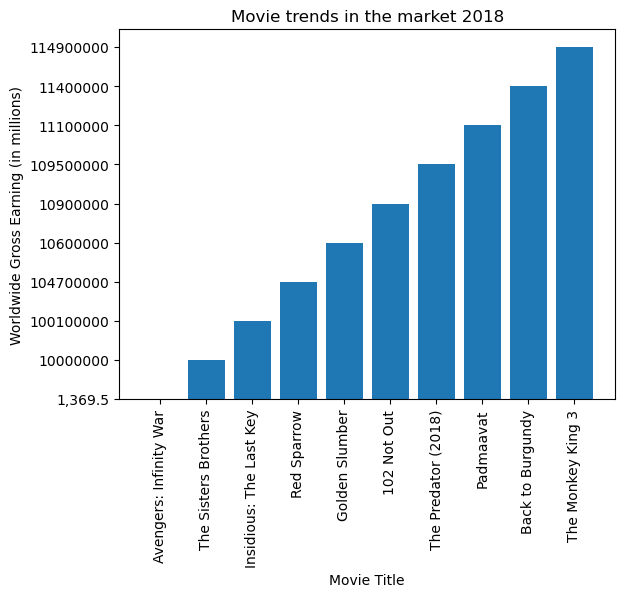

In [383]:
bom_movie = pd.read_csv("zippedData/bom.movie_gross.csv")

#filtered to relevant year 2018
movies_2018 = bom_movie[bom_movie['year'] == 2018]

#Sorted the movies by international gross earnings low to high
movies_2018_sorted = movies_2018.sort_values('foreign_gross', ascending=True)

#Focused on top 10 movies
top_10_movies_2018 = movies_2018_sorted.head(10)

#Bar graph of top 10 movies
plt.bar(top_10_movies_2018['title'], top_10_movies_2018['foreign_gross'])

#setthe Title and labels
plt.title('Movie trends in the market 2018')
plt.xlabel('Movie Title')
plt.ylabel('Worldwide Gross Earning (in millions)')
plt.xticks(rotation=90)

plt.show()

## Observations

Made use of the most recent data of 2018 and noticed that, The monkey King 3 movie is leading on world wide gross Earnings.It is doing great worldwide and has the highest foreign gross income of over 11.4 Millions compared to other movies.Back to Burgundy is following closely at number 2 from the sample and Avengers:Infinity has no World gross earnings.

## figure.3
Bar plot used to analyse the  movies that have had a success in the domestic market

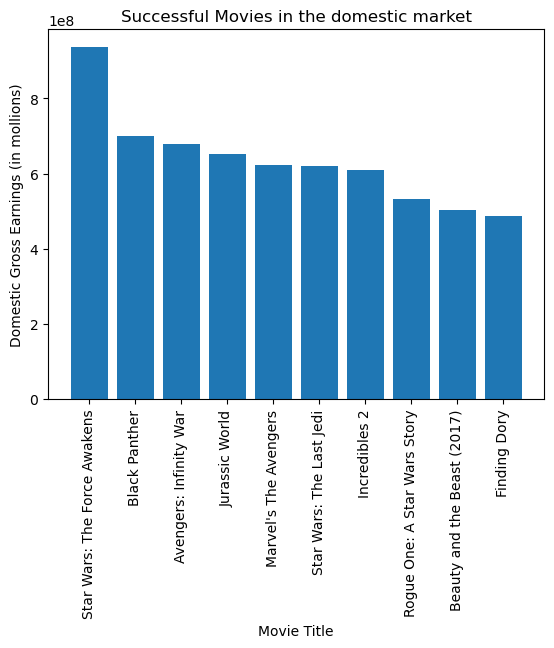

In [384]:
#Filtered data
movies_domestic = bom_movie[bom_movie['domestic_gross'].notnull()]

#Sorted movies in descending with high return to the lowest in data sample
movies_domestic_sorted = movies_domestic.sort_values('domestic_gross', ascending= False)

#Selected top 10 movies_domestic_sorted
top_10_movies_domestic = movies_domestic_sorted.head(10)

#Created bar graph
plt.bar(top_10_movies_domestic['title'], top_10_movies_domestic['domestic_gross'])

#Set title and axis labels
plt.title('Successful Movies in the domestic market')
plt.xlabel('Movie Title')
plt.ylabel('Domestic Gross Earnings (in mollions)')
plt.xticks(rotation=90)

plt.show()

## Observations

Locally, star Wars:The force Awakens movie proves to be the most popular movie and has domestic gross earning of over 8 million.
From the sample,Finding dory is struggling and is at the bottom and registered a low domestic Gross Earning of approximatelly 5 million.

## figure.4

Bar plot used to show which films are likely to be successful in future
Analysed Type of films that are likely to be successful in the future to have a good understanding on how the  film or films have behaved over the years.(Though not really accurate i was supposed to use a model for this,to forecast)

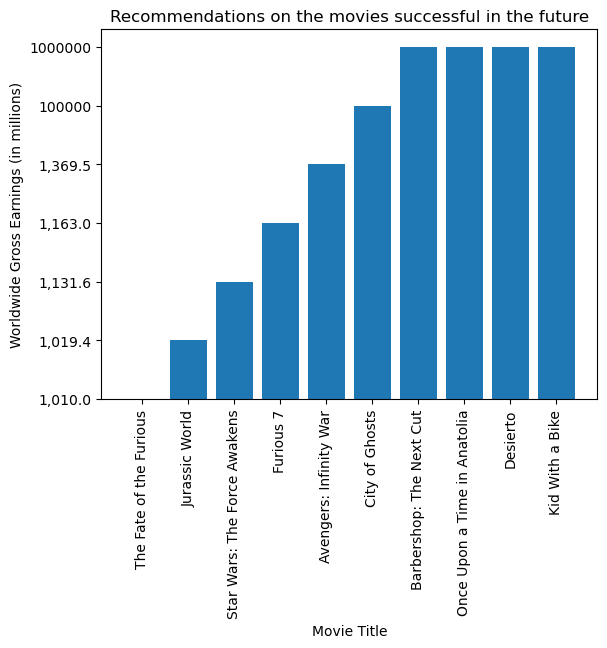

In [385]:
#Sorted movies in ascending order with highest foreign_gross to the one with the losest in data sample
movies_sorted = bom_movie.sort_values('foreign_gross', ascending=True)

#Top 10 movies
top_10_movies = movies_sorted.head(10)

#Created a bar graph of the top 10 movies
plt.bar(top_10_movies['title'], top_10_movies['foreign_gross'])
plt.title('Recommendations on the movies successful in the future')
plt.xlabel('Movie Title')
plt.ylabel('Worldwide Gross Earnings (in millions)')
plt.xticks(rotation=90)
plt.show()

## Observations

From the bar graph,i didn't limit myself to a certain year,Generally,kid with a bike movie  shows consistence by being on top of the game having a worldwide gross earning of almost 1 million over the years.The movie that is doing poorly in the worldwide market over the years is The fate of the Furious.

##  DATA EXPLORATION/ANALYSIS USING ROTTEN TOMATOES DATA

I this section of the project i used the Rotten tomatoes data which is a csv file in the zipped data 

In [386]:
#read csv files

reviews = pd.read_csv('./zippedData/rt.reviews.tsv.gz', sep="\t", encoding='unicode_escape')
movie_info = pd.read_csv('./zippedData/rt.movie_info.tsv.gz', sep="\t")

#Display the first five rows of the movie_info DataFrame
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


     WORKED WITH
     
    a)Movie_info data
    
     b)reviews data

     a)movie_info data

In [387]:
## Understanding the shape of movie_info data
movie_info.shape

(1560, 12)

The data has 1560 rows and 12 columns

ii)checking the information of the data contained in movie_info

In [388]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


From the information above obtained from the movie_info,I was able to observe the following:

The total number of entries was 1560

There was both Numerical and categorical data:

a)Numerical data[id]

b)categorical data [synopsis, rating,genre,director,writer,theater,dvd_date,currency,box_office,runtime,studio ]

I had quite a huge number of missing values in my data in:
   1.synopsis             8.writer
   2.theater_date         9.dvd_date
   3.currency             10.box_office
   4.runtime              11.studio
   5.rating
   6.genre
   7.director



checked last 4 rows entries

In [389]:
movie_info.tail(4)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


Noted a large number of Nan values in different columns

In [390]:
#checking null values 
#isnull is used
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

Most of the categorical variables have null values

In [391]:
movie_info.isna()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,False,False,False,False,False,False,False,False,True,True,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,False,True
3,False,False,False,False,False,False,False,False,True,True,False,True
4,False,True,False,False,False,False,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,False,False,False,False,True,True,False,False,False,False,False,False
1556,False,False,False,False,False,False,False,False,True,True,False,False
1557,False,False,False,False,False,True,False,False,True,True,False,True
1558,False,False,False,False,False,False,False,False,True,True,False,True


All cells containing NaN value return True while cells containing valid data return False.

## 3.3.Data cleaning movie_info data

    Solved the missing data problem by dropping the columns which seemed to have a lot of null values

In [392]:
movie_info.drop(['synopsis','director','writer','theater_date','dvd_date','currency','box_office','studio'],
               axis = 1,inplace=True)

      Dropped the rows with lots of NaNs

In [393]:
movie_info.dropna(subset = ['rating','genre','runtime'],inplace = True)

     confirming there are no missing values

In [394]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1526 entries, 0 to 1559
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1526 non-null   int64 
 1   rating   1526 non-null   object
 2   genre    1526 non-null   object
 3   runtime  1526 non-null   object
dtypes: int64(1), object(3)
memory usage: 59.6+ KB


checked for duplicates

In [395]:
duplicates = movie_info[movie_info.duplicated()]
duplicates.head()

,id,rating,genre,runtime


Note: Noted the movie_info data had no duplicates

    b)reviews data

In [396]:
## Understanding the shape of reviews data
reviews.shape

(54432, 8)

The data has 54432 rows and 8 columns

ii)checking the information of the data contained in reviews data

In [397]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


From the information above obtained from the movie_info,I was able to observe the following:

The total number of entries was 54432

There was both Numerical and categorical data:

a)Numerical data[id,top_critic]

b)categorical data [review,rating,fresh,critic,publisher,date]

I had quite a huge number of missing values in my data mostly contributed by some of the categorical data.That is [review,rating,critic,publisher]

checked last 4 rows entries

In [398]:
reviews.tail(4)

,id,review,rating,fresh,critic,top_critic,publisher,date
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


Noted a large number of Nan values in review column

In [399]:
#checking null values 
#isnull is used
reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

Most of the categorical variables have null values

In [400]:
reviews.isna()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False
2,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...
54427,False,False,True,False,False,False,False,False
54428,False,True,False,False,False,False,False,False
54429,False,True,False,False,False,False,False,False
54430,False,True,False,False,False,False,False,False


All cells containing NaN value return True while celss containing valid data return False.

Solved the missing data problem by dropping the columns which seemed to have a lot of null values

### 3.4.Data cleaning reviews data

In [401]:
#dropping rows with null values
reviews.dropna(inplace = True)

confirmed that the rating and rows with null values have been dropped.

In [402]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33988 entries, 0 to 54424
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          33988 non-null  int64 
 1   review      33988 non-null  object
 2   rating      33988 non-null  object
 3   fresh       33988 non-null  object
 4   critic      33988 non-null  object
 5   top_critic  33988 non-null  int64 
 6   publisher   33988 non-null  object
 7   date        33988 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.3+ MB


checked for duplicates

In [403]:
duplicates = reviews[reviews.duplicated()]
duplicates.head()

,id,review,rating,fresh,critic,top_critic,publisher,date


No duplicates detected

## Data visualization - movie_info data and Reviews data

The reviews data and movie_info data obtained from  rotten tomatoes had some attributes in common.Both data had an id column.
I banked on this to merge this two data sets and carry a visualization to see how different movie ratings performed in the market.

In [404]:
#merging the movie_info dataframe and reviews dataframe
df_merged = reviews.merge(movie_info, how = 'inner',on = 'id')

In [405]:
#displaying the df
df_merged.head()

,id,review,rating_x,fresh,critic,top_critic,publisher,date,rating_y,genre,runtime
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",R,Drama|Science Fiction and Fantasy,108 minutes
1,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013",R,Drama|Science Fiction and Fantasy,108 minutes
2,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",R,Drama|Science Fiction and Fantasy,108 minutes
3,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013",R,Drama|Science Fiction and Fantasy,108 minutes
4,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013",R,Drama|Science Fiction and Fantasy,108 minutes


In [406]:
#grouping df_merged by rating_y and fresh rating system
df_ratings = df_merged.groupby(['rating_y','fresh'])['id'].count().unstack()

In [407]:
#sorting values by fresh rating
df_ratings = df_ratings.sort_values('fresh',ascending = False)

In [408]:
#calling the function 
df_ratings

fresh,fresh,rotten
rating_y,,
R,9598,5173
PG-13,6239,5535
PG,3188,1765
NR,1031,270
G,444,165


## figure 5.

checked the popularity of movies based on their rating.

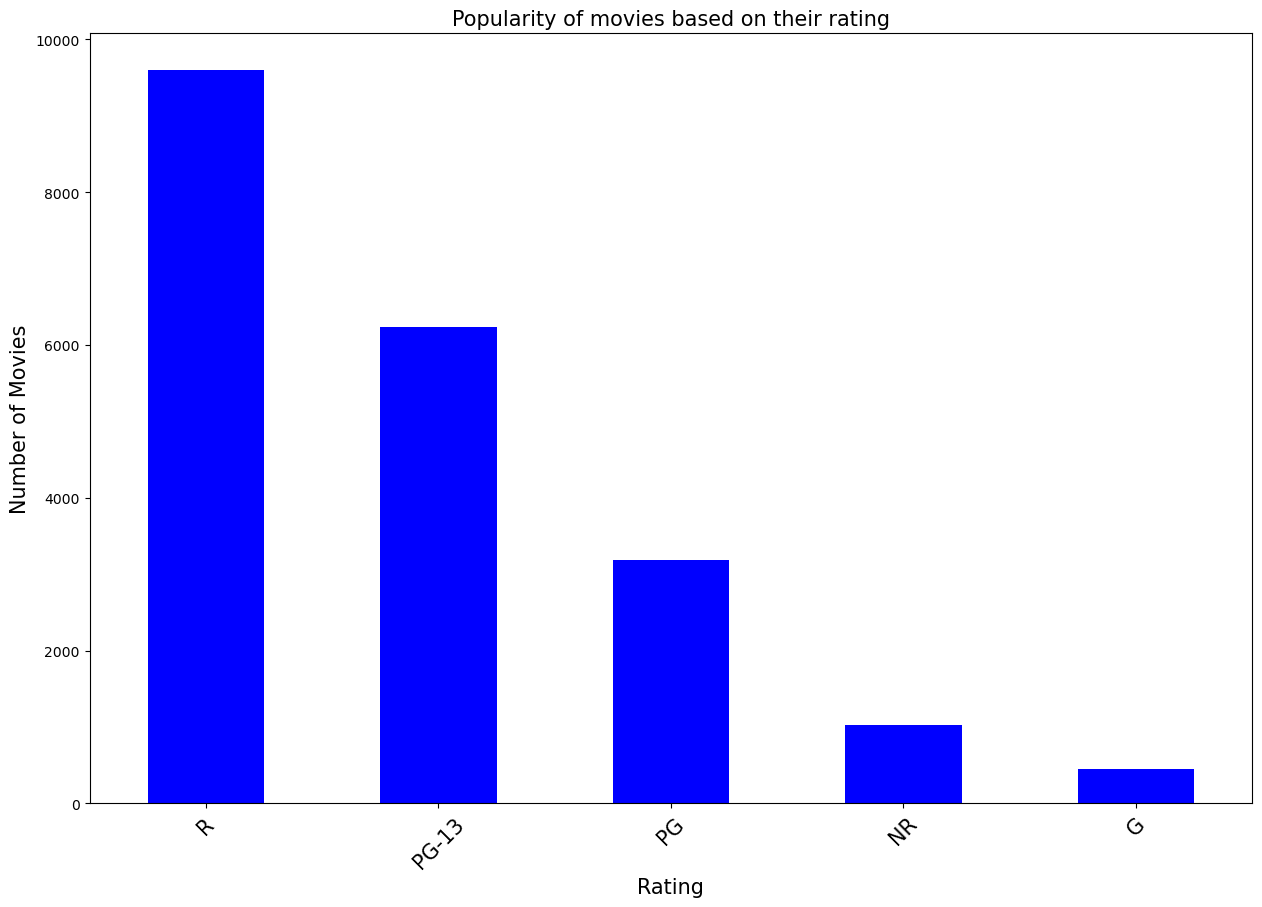

In [409]:
import matplotlib.pyplot as plt

# Plotting a bar graph of the ratings
fig, ax = plt.subplots(figsize=(15,10))

title = 'Popularity of movies based on their rating'
y_label = 'Number of Movies'
x_label = 'Rating'

df_ratings.fresh.plot(kind='bar', color='blue')  # Set the color to blue
ax.set_title(title, fontsize=15)
ax.set_ylabel(y_label, fontsize=15)
ax.set_xlabel(x_label, fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.show()

## Observation

Movies rated R is the most popular followed by the ones rated PG-13 and the movies rated G are struggling in the movie market and they came last this shows that they are less popular.

## 4.RESULTS

# figure.1

Bar graph of top 10 watched movies

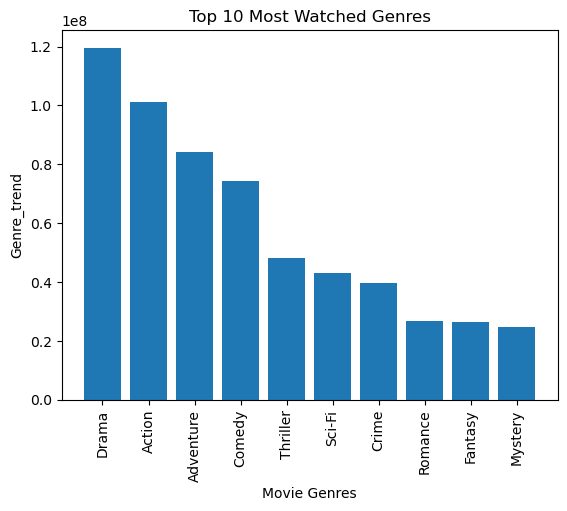

In [410]:
#Loaded my dataset
df = pd.read_sql("""
           SELECT *   
           FROM movie_ratings
           JOIN movie_basics
           USING (movie_id);
           """, conn)
df

#Splitted genres into separate values
df['genres'] = df['genres'].str.split(',')

#Created one row per genre per movie
df = df.explode('genres')

#Group by genre and find sum of votes(this helps to understand which movie the audience showed imence love)
genre_votes = df.groupby('genres')['numvotes'].sum()

#Sort by number of votes and Limit to the first 10
top_genres = genre_votes.sort_values(ascending=False)[:10]

#Plot a bar chart
plt.bar(top_genres.index, top_genres.values)
plt.xlabel('Movie Genres')
plt.ylabel('Genre_trend')
plt.title('Top 10 Most Watched Genres')
plt.xticks(rotation=90)
plt.show()

The most loved genre among the people is Drama,it has  the highest number in genre_trend, Followed by Action genre and Adventure comes in third.From the sample, Mystery Genre comes last and it is struggling on that spot. People showed less or no  interest in the genre together with fantacy and romance genre.

# figure.2

Bar plot showing movie trends in the year 2018

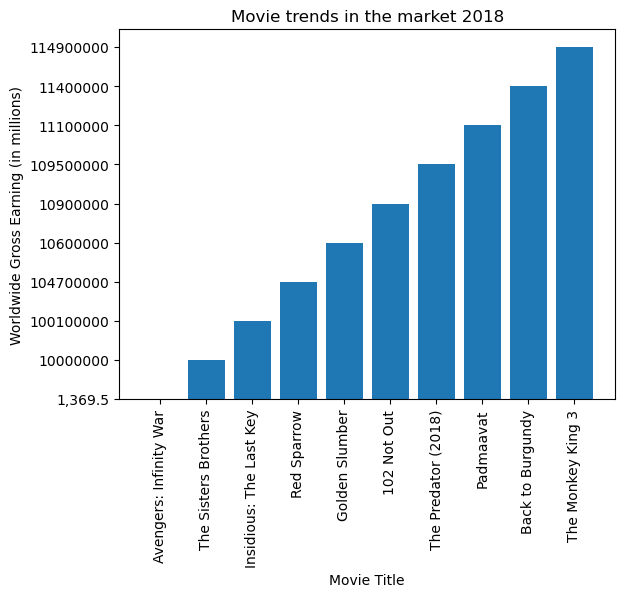

In [411]:
bom_movie = pd.read_csv("zippedData/bom.movie_gross.csv")

#filtered to relevant year 2018
movies_2018 = bom_movie[bom_movie['year'] == 2018]

#Sorted the movies by international gross earnings low to high
movies_2018_sorted = movies_2018.sort_values('foreign_gross', ascending=True)

#Focused on top 10 movies
top_10_movies_2018 = movies_2018_sorted.head(10)

#Bar graph of top 10 movies
plt.bar(top_10_movies_2018['title'], top_10_movies_2018['foreign_gross'])

#setthe Title and labels
plt.title('Movie trends in the market 2018')
plt.xlabel('Movie Title')
plt.ylabel('Worldwide Gross Earning (in millions)')
plt.xticks(rotation=90)

plt.show()

The monkey King 3 movie is leading on world wide gross Earnings.It is doing great worldwide and has the highest foreign gross income of over 11.4 Millions compared to other movies.Back to Burgundy is following closely at number 2 from the sample and Avengers:Infinity has no World gross earnings.

## figure.3

Bar plot used to analyse the movies that have had a success in the domestic market

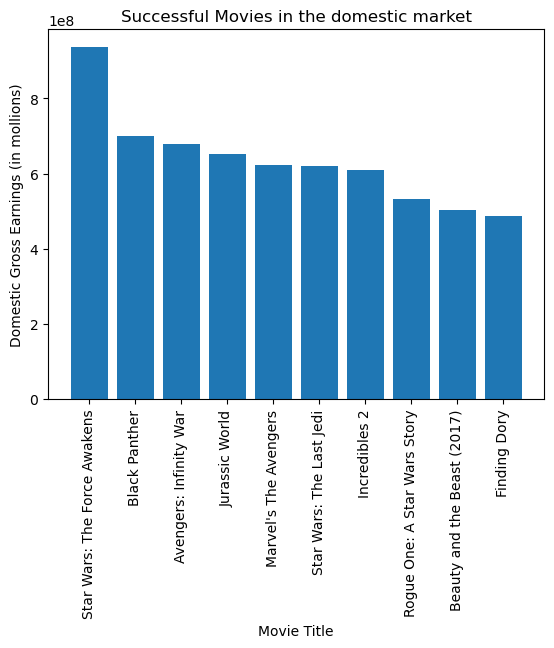

In [412]:
#Filtered data
movies_domestic = bom_movie[bom_movie['domestic_gross'].notnull()]

#Sorted movies in descending with high return to the lowest in data sample
movies_domestic_sorted = movies_domestic.sort_values('domestic_gross', ascending= False)

#Selected top 10 movies_domestic_sorted
top_10_movies_domestic = movies_domestic_sorted.head(10)

#Created bar graph
plt.bar(top_10_movies_domestic['title'], top_10_movies_domestic['domestic_gross'])

#Set title and axis labels
plt.title('Successful Movies in the domestic market')
plt.xlabel('Movie Title')
plt.ylabel('Domestic Gross Earnings (in mollions)')
plt.xticks(rotation=90)

plt.show()

Locally, star Wars:The force Awakens movie proves to be the most popular movie and has domestic gross earning of over 8 million. From the sample,Finding dory is struggling and is at the bottom and registered a low domestic Gross Earning of approximatelly 5 million.

## figure.4

Bar plot used to show which films are likely to be successful in future

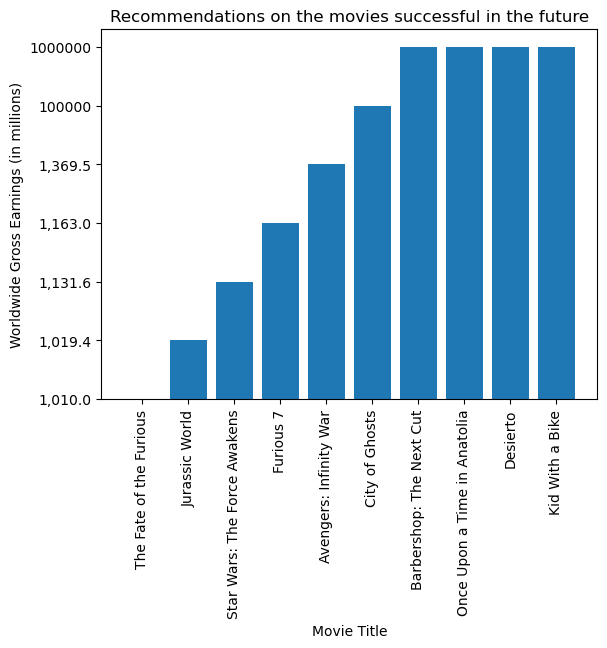

In [413]:
#Sorted movies in ascending order with highest foreign_gross to the one with the losest in data sample
movies_sorted = bom_movie.sort_values('foreign_gross', ascending=True)

#Top 10 movies
top_10_movies = movies_sorted.head(10)

#Created a bar graph of the top 10 movies
plt.bar(top_10_movies['title'], top_10_movies['foreign_gross'])
plt.title('Recommendations on the movies successful in the future')
plt.xlabel('Movie Title')
plt.ylabel('Worldwide Gross Earnings (in millions)')
plt.xticks(rotation=90)
plt.show()

kid with a bike movie  shows consistence by being on top of the game having a worldwide gross earning of almost 1 million over the years.The movie that is doing poorly in the worldwide market over the years is The fate of the Furious.

## figure 5

popularity of movies based on their rating

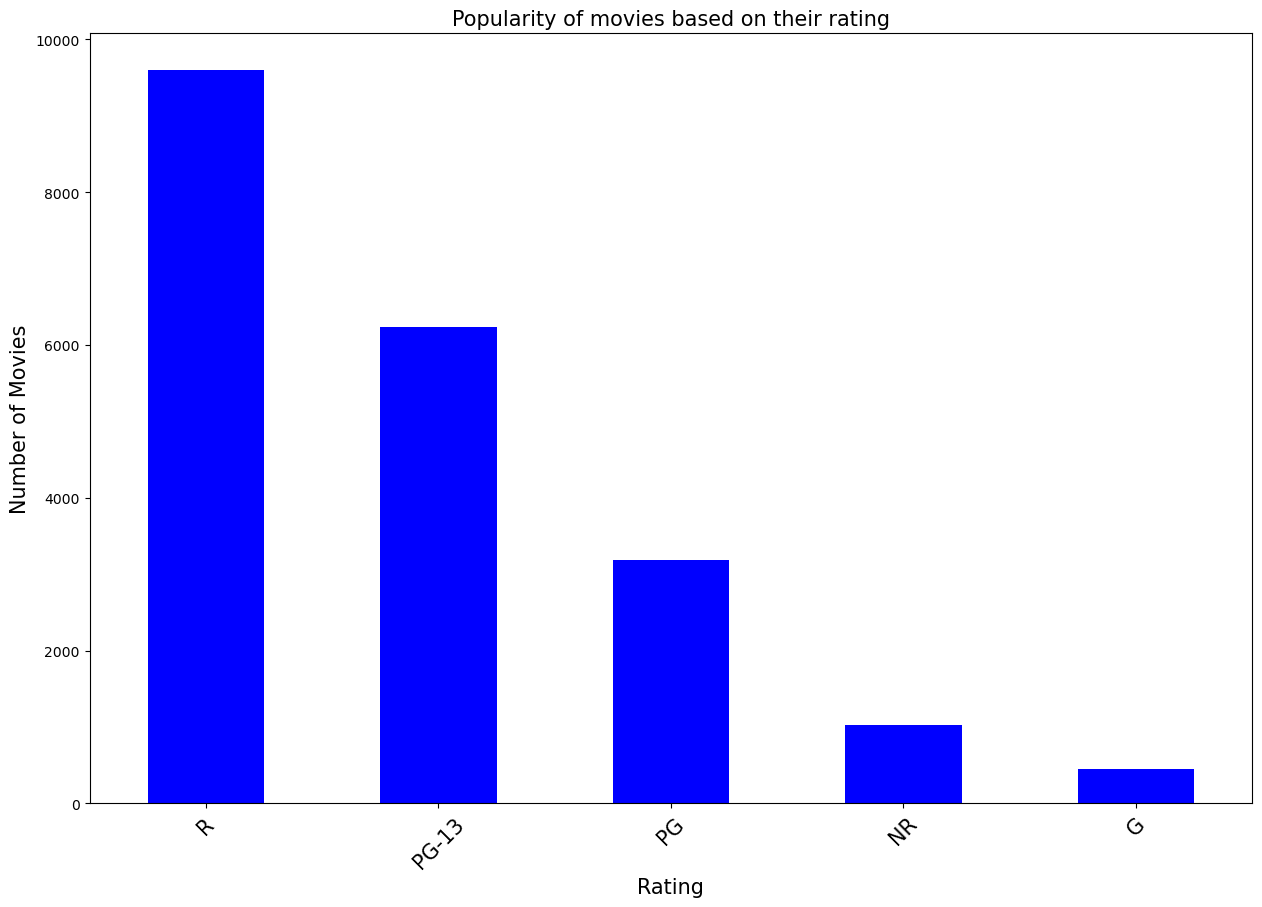

In [414]:
import matplotlib.pyplot as plt

# Plotting a bar graph of the ratings
fig, ax = plt.subplots(figsize=(15,10))

title = 'Popularity of movies based on their rating'
y_label = 'Number of Movies'
x_label = 'Rating'

df_ratings.fresh.plot(kind='bar', color='blue')  # Set the color to blue
ax.set_title(title, fontsize=15)
ax.set_ylabel(y_label, fontsize=15)
ax.set_xlabel(x_label, fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.show()

Movies rated R are the most popular followed by the ones rated PG-13 and the movies rated G are struggling in the movie market and they came last this shows that they are less popular.

## 5.CONCLUSION / RECOMMENDATIONS

## a) conclusion

The  project  yielded  the desired results. The main objective and specific objectives were all satisfied.The results showed that
the most loved genre among the people was Drama,the monkey King 3 movie was leading on world wide gross Earnings,and also Movies rated R were the most popular.

## b) Recommendations

1. I  would recommend Microsoft studio to produce more of these listed genres; Drama, Action movies and Adventure since they were the most loved genres and this will attract more audience and in return more revenue to Microsoft Studios.

2. I would recommend microsoft to produce movies like The monkey King 3 movie [2018] since it was doing great worldwide and had the highest foreign gross income of over 11.4 Millions,which translates to more money to the company as compared to producing the other movies

3. I would recommend microsoft to produce movies targetting the global market since it has proven with our data that the foreign_gross income  is more as compared to domestic_gross income and this will translate to more revenue for the company.For example Worldwide, the monkey king 3 movie is the one that was doing good and had a foreign gross income of 11.4 million while on the other hand star Wars:The force Awakens movie proved to be the most popular movie domestically and had domestic gross earning of over 8 million.

4. I  would recommend Microsoft studio to produce movies rated R or rated PG-13 since they were the most consumed and this in turn bring money to the company

5. I  would recommend Microsoft studio to produce movies like kid with a bike movie since it has shown consistence by being on top of the game having a worldwide gross earning of almost 1 million over the years.